# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Открытие файла с данными и изучение общей информации. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

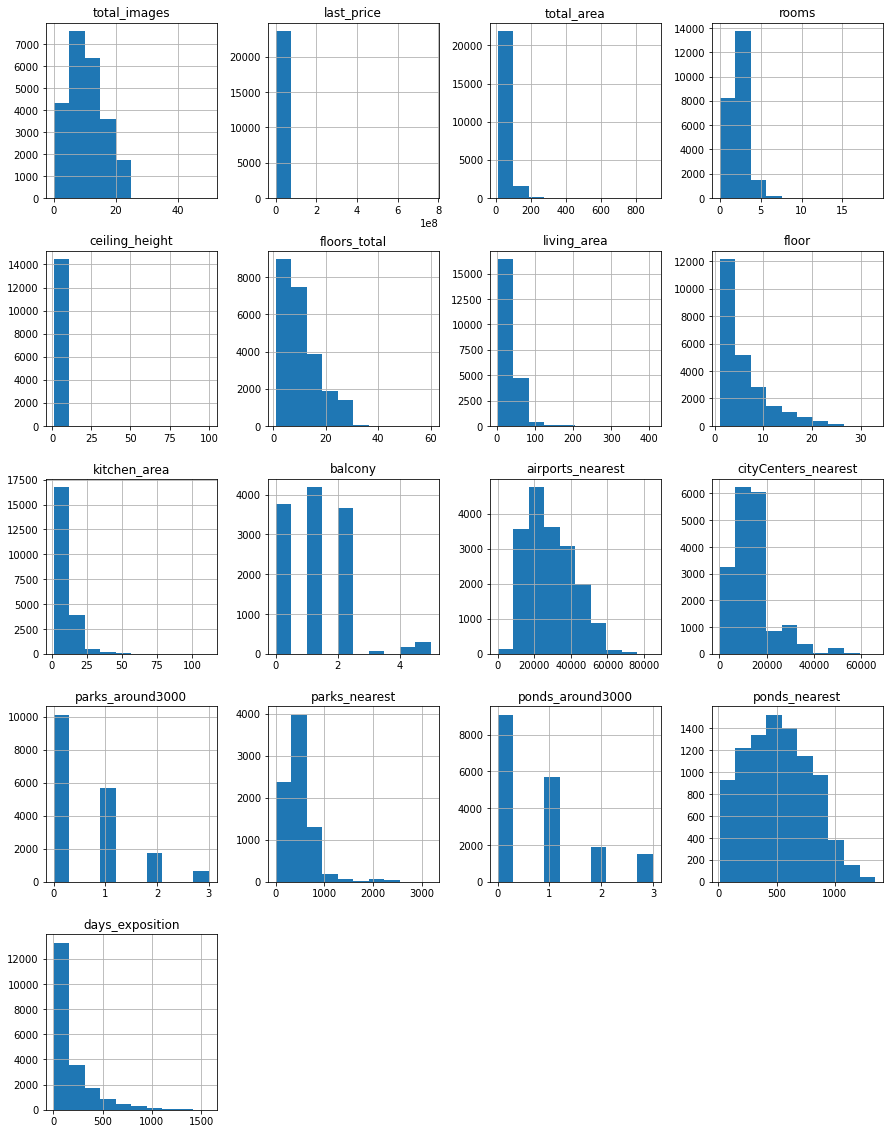

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 

data.info()
data.hist(figsize=(15, 20));


In [2]:
pd.set_option('display.max_columns', None)
data.head(15)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вывод: Первично изучив данные, установлено, что в них имеется большое количество пропусков. Необходимо обработать данные.


### Предобработка данных

Пропуски имеются в следующих данных:<br>
ceiling_height - высота потолков<br>
floors_total - всего этажей в доме<br>
living_area - жилая площадь в квадратных метрах<br>
is_apartment - апартаменты <br>
kitchen_area - площадь кухни в квадратных метрах<br>
balcony - число балконов<br>
locality_name - название населенного пункта<br>
airports_nearest - расстояние до ближайшего аэропорта<br>
cityCenters_nearest - расстояние до центра города <br>
parks_around3000 — число парков в радиусе 3 км<br>
parks_nearest — расстояние до ближайшего парка (м)<br>
ponds_around3000 — число водоёмов в радиусе 3 км<br>
ponds_nearest — расстояние до ближайшего водоёма (м)<br>
days_exposition -  сколько дней было размещено объявление (от публикации до снятия)<br>
При этом необходимо измениить тип данных столбцов в соответствии с их значением.<br>

ceiling_height - количественное значение<br>
floors_total - количественное<br>
living_area - количественное<br>
is_apartment - качественное<br>
kitchen_area - количественное<br>
balcony - количественное<br>
locality_name - качественное<br>
airports_nearest - количественное<br>
cityCenters_nearest - количественное<br>
parks_around3000 - количественное<br>
parks_nearest - количественное<br>
ponds_around3000 - количественное<br>
ponds_nearest - количественное<br>
days_exposition - количественное<br>



Соответственно необходимо изменить тип данных в столбцах last_price, total_area,ceiling_height,floors_total, living_area, kitchen_area, airports_nearest,parks_nearest,ponds_nearest,days_exposition на числовой, столбец is_apartment в булевой, first_day_exposition в формат daytime.

Приведем названия столбцов к стилю змеиного регистра

In [4]:
data=data.rename(columns={'parks_around3000':'parks_around_3000','ponds_around3000':'ponds_around_3000','cityCenters_nearest':'city_centers_nearest'})


Заполним пропуски в имеющихся столбцах.

**Столбец ceiling_height**

Создадим функцию для заполнения пропусков медианным значением с группировкой по другому столбцу

In [5]:
def fillna_median_group (col_na, col_group):
    for value in data[col_group].unique():
        median_col_group = data.loc[data[col_group]==value, col_na].median()
        data.loc[(data[col_na].isna()) & (data[col_group]==value), col_na] = median_col_group
    print('количество пропусков: ', data[col_na].isna().sum())
# Где col_na - столбец, в котором имеются пропуски, col_group - столбец, по которому группируют

найти подходящий параметр по которому заполнять пропуски столбца ceiling_height проблематично, так как высота потолка может не зависить ни от какого из имеющихся значений. Скорее всего наилучшим способом будет заполнение столбца медианой

In [6]:
data.loc[data['ceiling_height'].isna(),'ceiling_height']=data.loc[data['ceiling_height']!=data['ceiling_height'].isna(),'ceiling_height'].median()

In [7]:
data['ceiling_height'].isna().sum()

0

**Столбец floors_total**


Определить количество этажей в доме по имеющимся данным не представляется возможным. Количество пропусков незначительное, в виду чего можно удалить данные с пропусками по этому столбцу

In [8]:
data=data.dropna(subset=['floors_total']).reset_index(drop=True)
data['floors_total'].isna().sum()

0

**Столбец living_area**

Общая площадь квартиры, скорее всего будет сильно коррелировать с количеством комнат, проверим коэффициент корреляции, и, если гипотеза подтвердится, то заполним пропуски в данном столбце по медианному значению при группировке по столбцу 'rooms'

In [9]:
data['living_area'].corr(data['rooms'])

0.8460058343889176

In [10]:
fillna_median_group('living_area','rooms')

количество пропусков:  0


проверим, нет ли логических несоответствий, при которых значение в living_area больше значений в total_area

In [11]:
data.query('living_area > total_area')['living_area'].count()

29

29 несоответствий, в данном случае необходимо приравнять значения из living_area и total_area.

In [12]:
data.loc[data['living_area'] > data['total_area'], 'living_area'] = data.loc[data['living_area'] > data['total_area'], 'total_area']
data.query('living_area > total_area')['living_area'].count()


0

**столбец is_apartment**

Так как количество пропусков велико, а определение является ли квартира аппартаментами является обязательным для сообщения покупателю, логично предположить, что пропуски обусловлены тем, что квартира не является аппартаментами. Заполним пропуски

In [13]:
data['is_apartment']=data['is_apartment'].fillna('False')
data['is_apartment'].isna().sum()

0

**Cтолбец kitchen_area**


Заполним пропуски медианой при группировке по столбцу rooms, аналогично с living_area

In [14]:
fillna_median_group('kitchen_area','rooms')

количество пропусков:  194


In [15]:
print(data.query('kitchen_area.isna()')['open_plan'].value_counts())
data.query('kitchen_area.isna()')['studio'].value_counts()

False    135
True      59
Name: open_plan, dtype: int64


True     135
False     59
Name: studio, dtype: int64

194 пропуска обусловлены тем, что они находятся в квартирах-студиях или в квартирах со свободной планировкой, в которых площадь кухни отдельно не выделяется. Заменим оставшиеся пропуски на 0

In [16]:
data['kitchen_area']=data['kitchen_area'].fillna(0)
data['kitchen_area'].isna().sum()

0

**Столбец balcony**

Аналогично со столбцом is_apartment заменим пропуски на 0

In [17]:
data['balcony']=data['balcony'].fillna(0)

**Столбец locality_name**

Отсутствие сведений о населенном пункте может значительно повлиять на результат исследования, учитывая, что количество пропусков в данном столбце не велико, удалим строки с пропусками в этом столбце

In [18]:
data=data.dropna(subset=['locality_name']).reset_index(drop=True)


**Столбцы airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest**

Заполнение пропусков медианным, средним значением или 0 повлияет на качество исследования, при этом и удаление полностью строк с пропущенными значениями также ухудшит качество, в виду большого их количества. В виду чего, возможно заполнить пропуски значениями, которые не соответствуют действительности, но при этом не отбросят строки, например -1. Таким образом мы сможем и далее применять строки, в которых имелись пропуски по данным столбцам

In [19]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(-1)
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)

**Столбцы parks_around_3000 и ponds_around_3000**


Логично предположить, что отсутствие значения в данных столбцах означает отсутствие данных объектов рядом с квартирой. Заменим пропуски на 0

In [20]:
data['parks_around_3000']=data['parks_around_3000'].fillna(0)
data['ponds_around_3000']=data['ponds_around_3000'].fillna(0)

**Столбец days_exposition**

Можно предположить, что пропуски в данном столбце обусловлены тем, что объявление действующее на момент сбора данных. Чтобы это проверить, необходим столбец first_day_exposition, однако, для работы с ним, необходимо изменить его тип

In [21]:

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

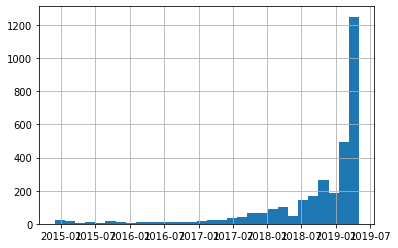

In [22]:
de_na = data.query('days_exposition.isna()')
de_na['first_day_exposition'].hist(bins=30);

Гипотеза подтверждается: Чем позднее дата, тем больше пропусков в столбце с информацией о дате снятия объявления.<br>
Заполним пропуски из учета, что объявление действовало по крайней мере до дня сбора данных. Для этого необходимо определить дату сбора данных и вычесть дату дня размещения. Вычисления будем производить по количеству дней

In [23]:

max_day=data['first_day_exposition'].max()
data.loc[data['days_exposition'].isna(),'days_exposition'] = (max_day-data.loc[data['days_exposition'].isna(),'first_day_exposition']).dt.days
data['days_exposition'].isna().sum()


0

In [24]:
#Проверим все ли пропуски заполнены
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Все пропуски заполнены, перейдем к изменению типов данных в столбцах


In [25]:
change_type=['last_price', 'floors_total', 'balcony','parks_around_3000', 'parks_nearest', 'ponds_around_3000','ponds_nearest', 'airports_nearest', 'city_centers_nearest', 'days_exposition']
data[change_type]=data[change_type].astype(int)
data['is_apartment']=data['is_apartment'].astype(bool)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Проверим на явные дубликаты

In [26]:
data.duplicated().sum()

0

Явных дубликатов нет. Поиск неявных дубликатов имеет смысл только в столбце locality_name, так как тут содержатся названия населенных пунктов

In [27]:
display(data['locality_name'].sort_values().unique())
len(data['locality_name'].unique())


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

364

Приведем все названия к нижнему регистру, заменим "ё" на "е", и заменим название "городской поселок"

In [28]:
data['locality_name']=data['locality_name'].str.replace('ё', 'е')
data['locality_name']=data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name']=data['locality_name'].str.lower()
len(data['locality_name'].unique())


323

In [29]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары',
       'поселок городского типа янино-1', 'поселок парголово',
       'поселок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посел

Неявные дубликаты устранены

**Найдем и исправим аномальные значения**

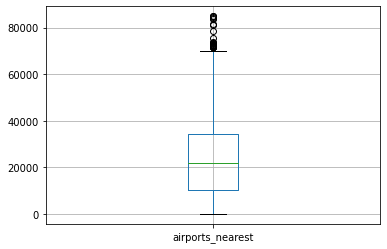

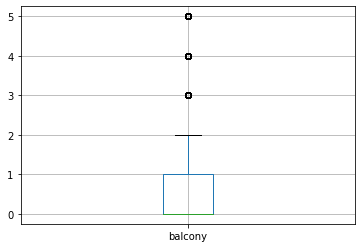

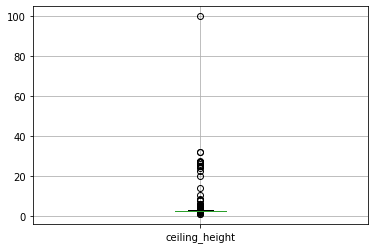

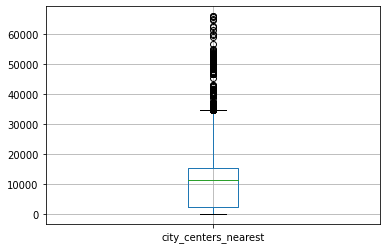

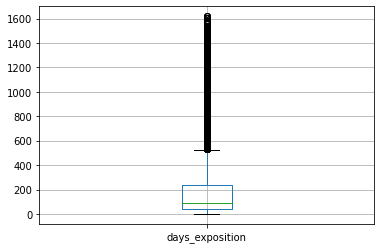

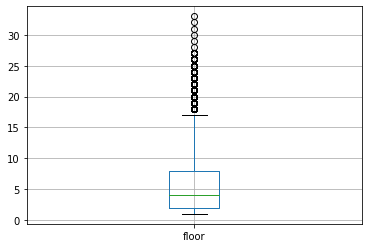

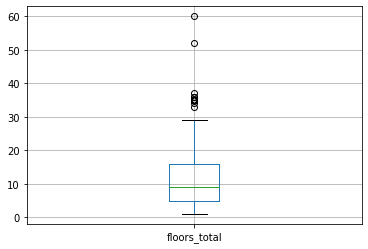

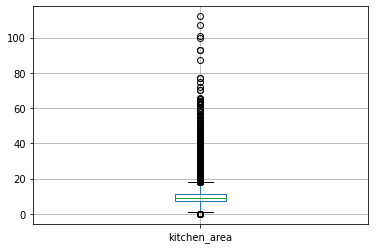

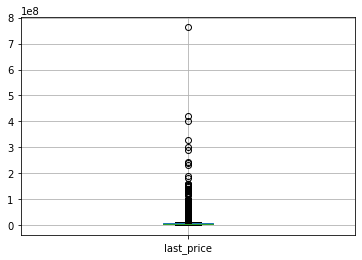

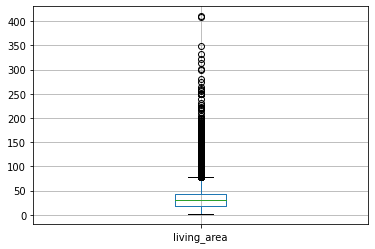

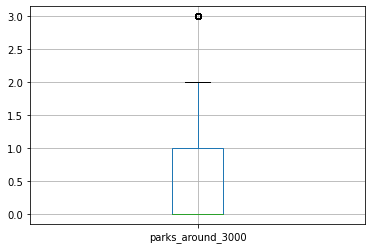

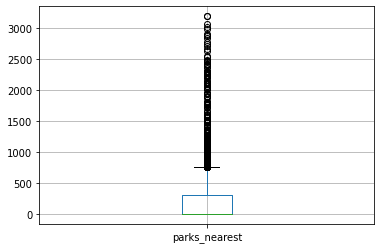

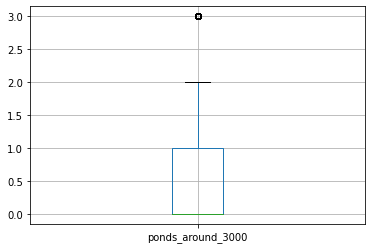

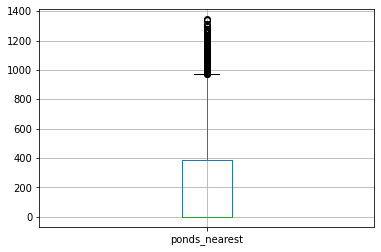

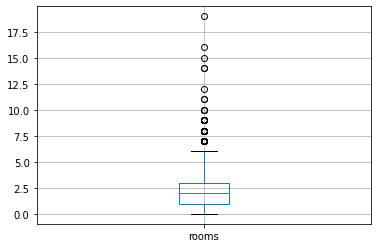

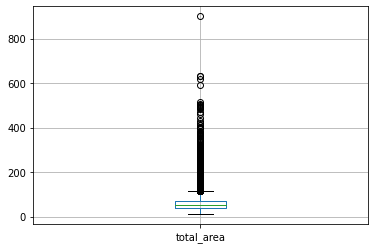

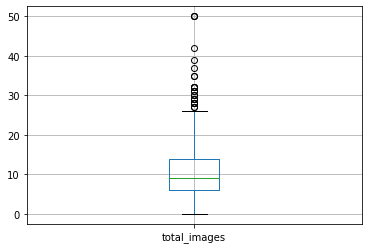

In [30]:
anomaly = ['airports_nearest', 'balcony', 'ceiling_height', 'city_centers_nearest', 'days_exposition', 'floor', 'floors_total', 'kitchen_area', 'last_price', 'living_area', 'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'rooms', 'total_area', 'total_images']

for column in anomaly:
    plt.figure()
    data.boxplot([column])


Наблюдаются аномалии в столбцах ceiling_height, total_area и last_price

В столбце ceiling_height явное логическое несоответствие, в значениях более 20 м скорее всего допущена опечатка и не проставлен разделительный знак, при этом значения от 0 до 2 и от 5 до 20 являются явно ошибочными.
Исправим аномалии

In [31]:
data.loc[(data['ceiling_height']>50),'ceiling_height']=data.loc[(data['ceiling_height']>=2)&(data['ceiling_height']<=5),'ceiling_height'].median()

In [32]:
data.loc[data['ceiling_height']<2,'ceiling_height']=data.loc[(data['ceiling_height']>=2)&(data['ceiling_height']<=5),'ceiling_height'].median()

In [33]:
data.loc[(data['ceiling_height']>5) & (data['ceiling_height']<20),'ceiling_height']=data.loc[(data['ceiling_height']>=2)&(data['ceiling_height']<=5),'ceiling_height'].median()

In [34]:
data.loc[(data['ceiling_height']>=20)& (data['ceiling_height']<=50),'ceiling_height']=data.loc[(data['ceiling_height']>=20)& (data['ceiling_height']<=50),'ceiling_height']/10

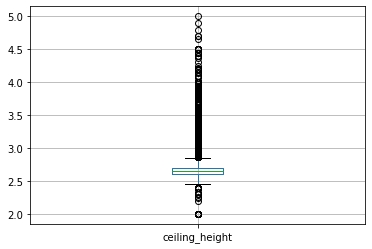

In [35]:
data.boxplot(column='ceiling_height');

В столбце total_area наблюдаются аномалии с площадью более 500 кв. м. и менее 10 кв. м. Удалим сведения о таких квартирах

In [36]:
data=data.query('10<=total_area<=500')

В столбце last_price аномальные значения более 40 млн. Удалим сведения о таких квартирах.

In [37]:
data=data.query('100000<=last_price<=40000000')

**Вывод**

Изначально в данных имелось большое количество пропусков, проводить исследование на основании таких данных нецелесообразно.
Пропущенные значения были заполнены в зависимости от типа и логики данных содержащихся в каждом столбце.
Изменен тип данных в столбцах, устранены дубликаты. Также были обнаружены аномальные значения в столбцах ceiling_height, total_area и last_price, анамалии устранены.
Можно переходить к анализу данных.

### Добавление в таблицу новых столбцов

Добавим цену одного квадратного метра

In [39]:
data['price_for_m']=data['last_price']/data['total_area']

Добавим день недели, месяц и год публикации объявления

In [40]:
data['exposition_day']=data['first_day_exposition'].dt.weekday

In [41]:
data['exposition_month']=data['first_day_exposition'].dt.month

In [42]:
data['exposition_year']=data['first_day_exposition'].dt.year

Добавим тип этажа квартиры (первый, другой, последний)


In [43]:
def floors_number(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floors_identity']=data.apply(floors_number,axis=1)

Переведем расстояние до центра города из м в км и округлим до целых значений.

In [44]:
data['city_centers_nearest']=(data['city_centers_nearest']/1000).round()

Проверим добавленные столбцы

In [45]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around_3000       0
parks_nearest           0
ponds_around_3000       0
ponds_nearest           0
days_exposition         0
price_for_m             0
exposition_day          0
exposition_month        0
exposition_year         0
floors_identity         0
dtype: int64

In [46]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_for_m,exposition_day,exposition_month,exposition_year,floors_identity
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,санкт-петербург,18863,16.0,1,482,2,755,57,120370.370370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,поселок шушары,12817,19.0,0,-1,0,-1,81,82920.792079,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,санкт-петербург,21741,14.0,1,90,2,574,558,92785.714286,3,8,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,санкт-петербург,31856,8.0,2,112,1,48,121,100000.000000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,0,поселок городского типа янино-1,-1,-0.0,0,-1,0,-1,55,95065.789474,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,поселок парголово,52996,19.0,0,-1,0,-1,155,99195.710456,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,True,False,False,18.90,2,санкт-петербург,23982,12.0,0,-1,0,-1,15,110544.692737,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,0,поселок мурино,-1,-0.0,0,-1,0,-1,189,87454.764777,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,санкт-петербург,50898,15.0,0,-1,0,-1,289,88524.590164,6,2,2017,другой
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,True,False,False,8.50,0,санкт-петербург,38357,14.0,1,310,2,553,137,127525.252525,3,11,2017,другой


### Исследовательский анализ данных

Проведем исследовательский анализ следующих данных:<br>
общая площадь;<br>
жилая площадь;<br>
площадь кухни;<br>
цена объекта;<br>
количество комнат;<br>
высота потолков;<br>
этаж квартиры;<br>
тип этажа квартиры («первый», «последний», «другой»);<br>
общее количество этажей в доме;<br>
расстояние до центра города в метрах;<br>
расстояние до ближайшего аэропорта;<br>
расстояние до ближайшего парка;<br>
день и месяц публикации объявления.

**Общая площадь** 

count    23383.000000
mean        58.911757
std         30.061161
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        470.300000
Name: total_area, dtype: float64

<AxesSubplot:>

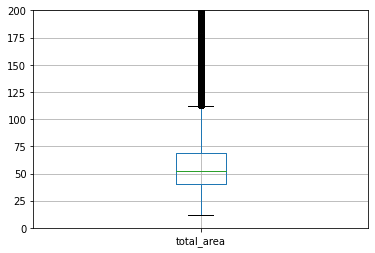

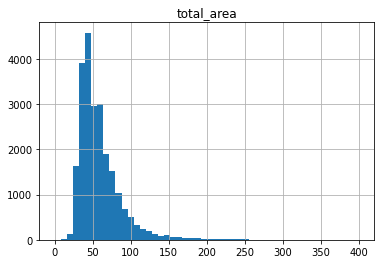

In [47]:
display(data['total_area'].describe())
plt.ylim(0,200)
display(data.boxplot(column='total_area'))
data.hist('total_area', bins =50,range=(0,400));


Исходя из данных, наибольшее количество квартир площадью от 25 до 80 квадратных метров, после 80 кв.м. число квартир заметно уменьшается, имеется значительный пик в пределах 40-45 кв.м.
Анализирую разброс данных, в переделы нормальных значений входят значения от 15 кв. м. до 112,5 кв. м., уберем из выборки остальные значения, при этом создадим новую переменную для хранения отредактированных значений.


In [48]:
good_data=data.query('15<=total_area<=112.5')

**Жилая площадь**

count    23383.000000
mean        33.605236
std         19.149389
min          2.000000
25%         18.300000
50%         30.100000
75%         42.200000
max        279.600000
Name: living_area, dtype: float64

<AxesSubplot:>

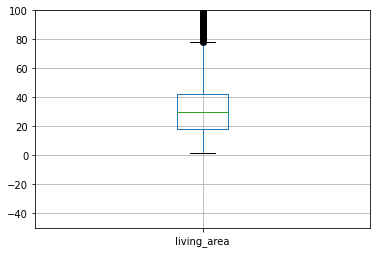

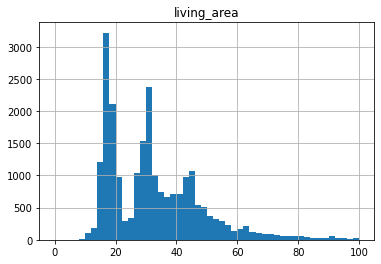

In [49]:
display(data['living_area'].describe())
plt.ylim(-50,100)
display(data.boxplot(column='living_area'))
data.hist('living_area', bins =50,range=(0,100));

Большее количество квартир находится в диапазоне от 12 до 50 кв.м. жилой площади, после 60 кв. м. количество квартир значительно уменьшается. При этом имеется два пиковых значения на диапазонах 18-20 кв. м. и 30-32 кв. м.
В пределы нормальных значений входят от 2 до 78 кв. м.

In [50]:
good_data=good_data.query('2<=living_area<=78')

**Площадь кухни**

count    23383.000000
mean        10.217428
std          5.182241
min          0.000000
25%          7.200000
50%          9.000000
75%         11.400000
max        100.700000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

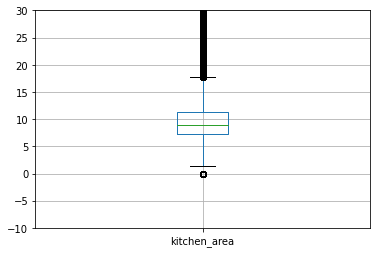

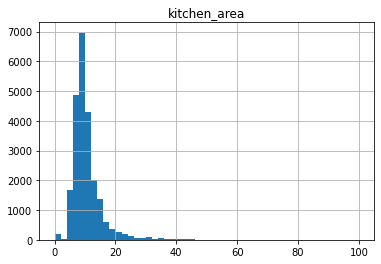

In [51]:
display(data['kitchen_area'].describe())
plt.ylim(-10,30)
display(data.boxplot(column='kitchen_area'))
data.hist('kitchen_area', bins =50,range=(0,100));

Больше всего квартир с площадью кухни от 4 до 16 кв. м., имеется пик на 10 кв.м. Нормальные значения в диапазоне от 2 до 16 кв. м., однако, следует учесть, что значения, где площадь кухни равна нулю - значения соответствующие квартирам-студиям и со свободной планировкой, эти данные убирать не нужно

In [52]:
good_data=data.query('kitchen_area<=16')

**Цена объекта**

count    23383.000000
mean         5.909172
std          4.616271
min          0.430000
25%          3.400000
50%          4.600000
75%          6.700000
max         40.000000
Name: last_price, dtype: float64

<AxesSubplot:>

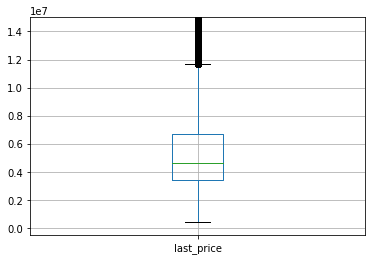

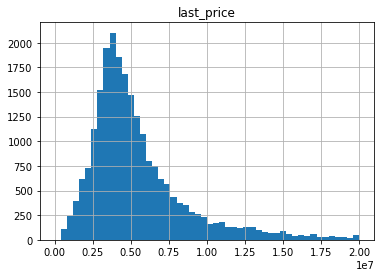

In [53]:
display((data['last_price']/1000000).describe())
plt.ylim(-500000,15000000)
display(data.boxplot(column='last_price'))
data.hist('last_price', bins =50,range=(0,20000000));

Больше всего квартир в диапазоне от 1 до 6 млн рублей, имеется пиковое значение в диапазоне 3 млн рублей, после 7.5 миллионов количество квартир значительно уменьшается. Нормальные значения в диапозоне от 500000 до 12000000 млн. рублей


In [54]:
good_data=good_data.query('500000<=last_price<=12000000')

**Высота потолков**

count    23383.000000
mean         2.692941
std          0.209379
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

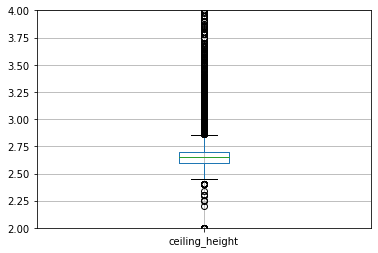

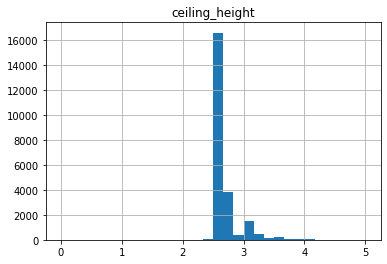

In [55]:
display(data['ceiling_height'].describe())
plt.ylim(2,4)
display(data.boxplot(column='ceiling_height'))
data.hist('ceiling_height', bins =30,range=(0,5));

У большей части квартир высота потолков 2.5-2.7 м, пиковое значение также 2.5 м., пределы нормальных значений 2.45 и 2.8 м.

In [56]:
good_data=good_data.query('2.45<=ceiling_height<=2.8')

**Количество комнат**

count    23383.000000
mean         2.052474
std          1.050244
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

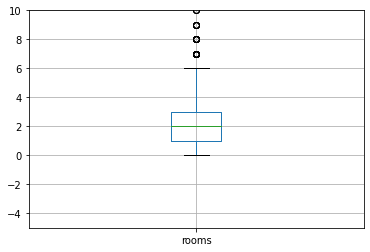

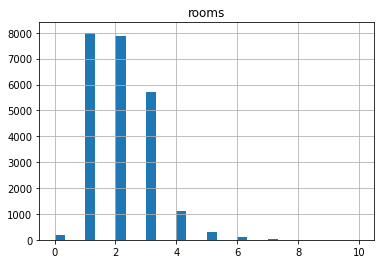

In [57]:
display(data['rooms'].describe())
plt.ylim(-5,10)
display(data.boxplot(column='rooms'))
data.hist('rooms', bins =30,range=(0,10));

Больше всего квартир имеющих от 1 до 3 комнат, пиковые значения аналогичные. Предел нормальных значений от 0 до 6

In [58]:
good_data=good_data.query('0<=rooms<=6')

**Этаж квартиры**

count    23383.000000
mean         5.882350
std          4.879628
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

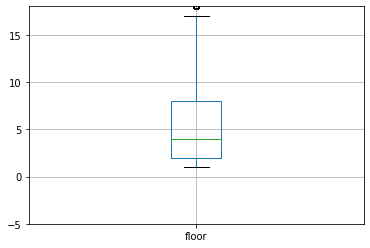

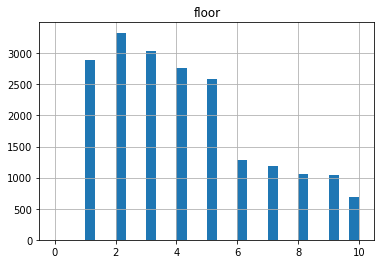

In [59]:
display(data['floor'].describe())
plt.ylim(-5,18)
display(data.boxplot(column='floor'))
data.hist('floor', bins =30,range=(0,10));

Больше всего квартир находятся с 1 по 5 этаж. Пиковое значение - 2 этаж, пределы нормальных значений 1 - 17

In [60]:
good_data=good_data.query('1<=floor<=17')

**Тип этажа квартиры**

count      23383
unique         3
top       другой
freq       17198
Name: floors_identity, dtype: object

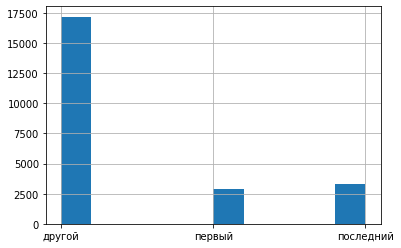

In [61]:
display(data['floors_identity'].describe())

data['floors_identity'].hist(bins=10);


Больше всего квартир, которые не находятся на первом или последнем этажах, при этом квартир на последних этажах больше, чем на первах, хоть и незначительно

**Общее количество этажей в доме**

count    23383.000000
mean        10.700210
std          6.607132
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

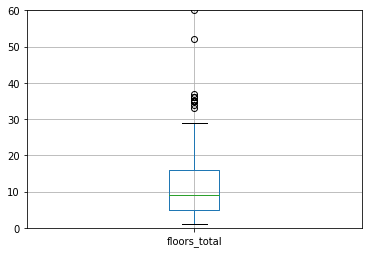

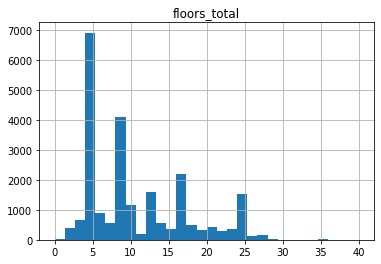

In [62]:
display(data['floors_total'].describe())
plt.ylim(0,60)
display(data.boxplot(column='floors_total'))
data.hist('floors_total', bins =30,range=(0,40));

Имеется несколько пиковых значений - 4 этаж,8 этаж, 16 этаж, 24 этаж, диапазон нормальных значений от 1 до 28 этажей

In [63]:
good_data=good_data.query('1<=floors_total<=28')

**Расстояние до центра города**

count    23383.000000
mean        10.921995
std          9.661851
min         -0.000000
25%          2.000000
50%         11.000000
75%         15.000000
max         66.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

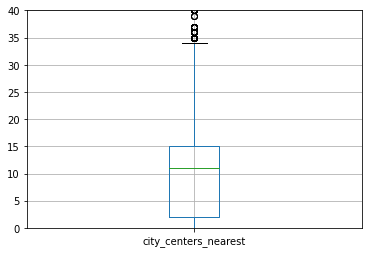

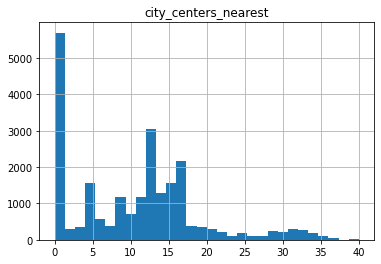

In [64]:
display(data['city_centers_nearest'].describe())
plt.ylim(0,40)
display(data.boxplot(column='city_centers_nearest'))
data.hist('city_centers_nearest', bins =30,range=(0,40));

Больше всего квартир с расстоянием до центра города от 0 до 1 км, имеются пики на 4-5, 12-13 и 16-17 км., нормальные значения в дипазоне от 0 до 34 км 

In [65]:
good_data=good_data.query('city_centers_nearest<34')

**Расстояние до ближайшего аэропорта**

count    17865.000000
mean     28817.448811
std      12684.811584
min          0.000000
25%      18500.000000
50%      26773.000000
75%      37393.000000
max      84869.000000
Name: airports_nearest, dtype: float64

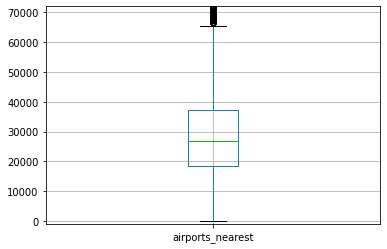

In [66]:
good_airports=data.query('airports_nearest!=-1')
display(good_airports['airports_nearest'].describe())
plt.ylim(-1000,72000)
good_airports.boxplot(column='airports_nearest');


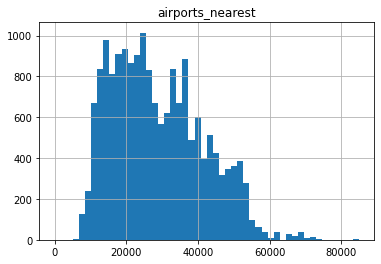

In [67]:
good_airports.hist(column='airports_nearest',bins=50);

Больше всего квартир в диапазоне с удаленностью от аэропорта от 2000 до 56000 м, пиковое значение в диапазоне 24000-26000 метров.
нормальные значения в диапазоне 0 - 65000 м, однако необходимо помнить, что у нас имеются нетипичные значения (-1)

In [68]:
good_data=data.query('airports_nearest<=65000')

**Расстояние до ближайшего парка**

count    7890.000000
mean      492.568821
std       342.003413
min         1.000000
25%       288.250000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

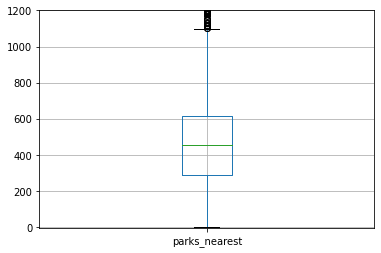

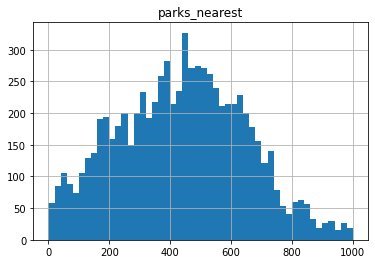

In [69]:
good_parks=data.query('parks_nearest!=-1')
display(good_parks['parks_nearest'].describe())
plt.ylim(-5,1200)
display(good_parks.boxplot(column='parks_nearest'));
good_parks.hist(column='parks_nearest',bins=50,range=(0,1000));

Больше всего квартир имеют парк в удаленности от 1 до 600 м, пиковое значение - 430-440 м, нормальные значения в диапазоне до 1100 м.

In [70]:
good_data=data.query('parks_nearest<=1100')

**День публикации объявления**

count    23383.000000
mean         2.567164
std          1.788422
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_day, dtype: float64

<AxesSubplot:>

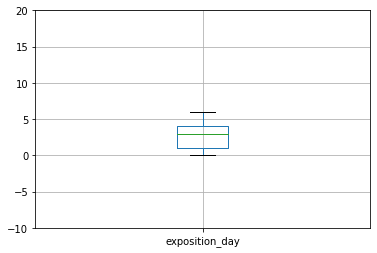

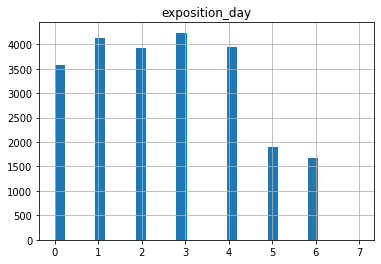

In [71]:
display(data['exposition_day'].describe())
plt.ylim(-10,20)
display(data.boxplot(column='exposition_day'))
data.hist('exposition_day', bins =30,range=(0,7));

По диаграмме видно, что объявления больше всего выкладывались в будние дни, количество объявлений в выходные примерно в два раза меньше, чем в каждый из будних дней.

count    23383.000000
mean         6.401018
std          3.492374
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

<AxesSubplot:>

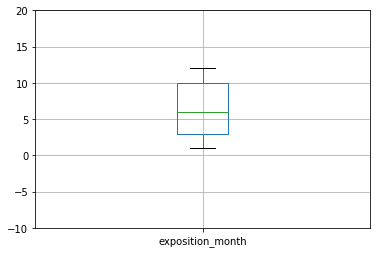

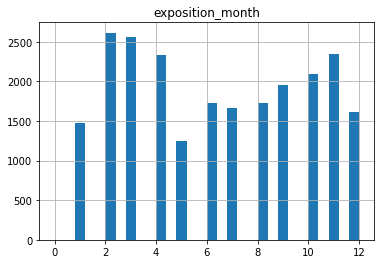

In [72]:
display(data['exposition_month'].describe())
plt.ylim(-10,20)
display(data.boxplot(column='exposition_month'))
data.hist('exposition_month', bins =30,range=(0,12));

Исходя из гистограммы, можно проследить некую закономерность(сезонность), в выставлении объявлений. Больше всего объявлений выкладывают в период с февраля по апрель, меньше всего в мае, далее, начиная с августа и по ноябрь включительно, опять наблюдается рост числа объявлений 

**Изучим, как быстро продавались квартиры (столбец days_exposition)**

In [73]:
good_data['days_exposition'].describe()

count    23074.000000
mean       183.764887
std        231.028235
min          0.000000
25%         43.000000
50%         93.000000
75%        233.000000
max       1618.000000
Name: days_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

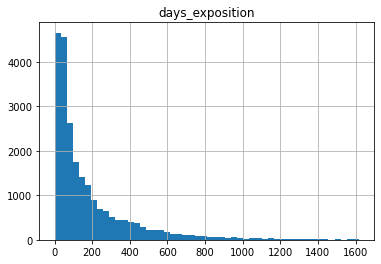

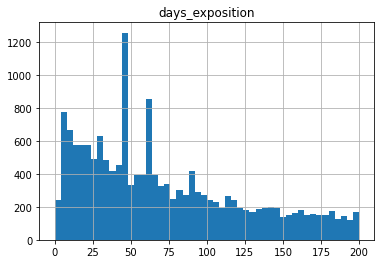

In [74]:
good_data.hist(column='days_exposition',bins=50);
display(good_data.hist(column='days_exposition',bins=50,range=(0,200)));
plt.show()

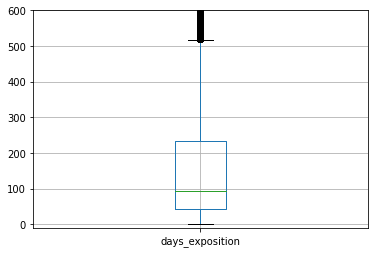

In [75]:
plt.ylim(-10,600)
good_data.boxplot(column='days_exposition');

Больше всего квартир продается в период до 90 дней, в среднем же продажа квартиры занимает 184 дня, имеются пиковые значения на 45 и на 60 день.Пределы нормальных значений в диапазоне от 0 до 520, межквартильный размах от 43 до 233, медиана  93. Следовательно квартира продана быстро, если с момента объявления прошло менее 43 дней и долго, если более 233 дней.

**Изучим зависимость цены от иных показателей**

**Зависимость цены от общей площади**

In [76]:
good_data['last_price'].corr(good_data['total_area'])

0.7865428857412611

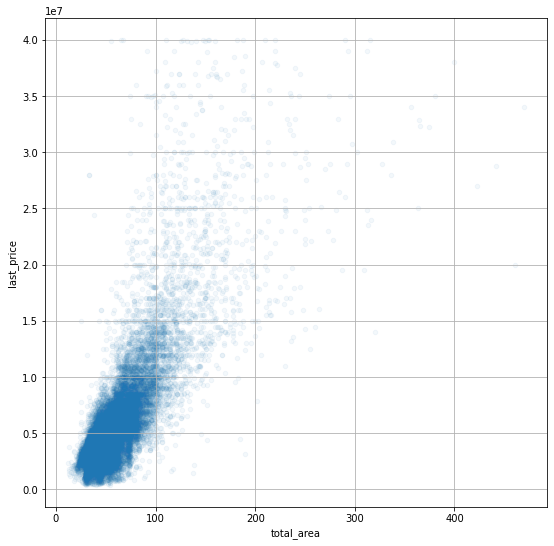

In [77]:
good_data.plot(kind='scatter',y='last_price',x='total_area',grid=True,figsize=(9,9),alpha=0.05);

Наблюдается сильная прямая зависимость. По графику видно, что до 100 кв.м. площадь квартиры в меньшей степени влияет на её стоимость, в отличии от квартир с площадью более 100 кв.м.

**Зависимость цены от жилой площади**

In [78]:
good_data['last_price'].corr(good_data['living_area'])


0.6728543681932022

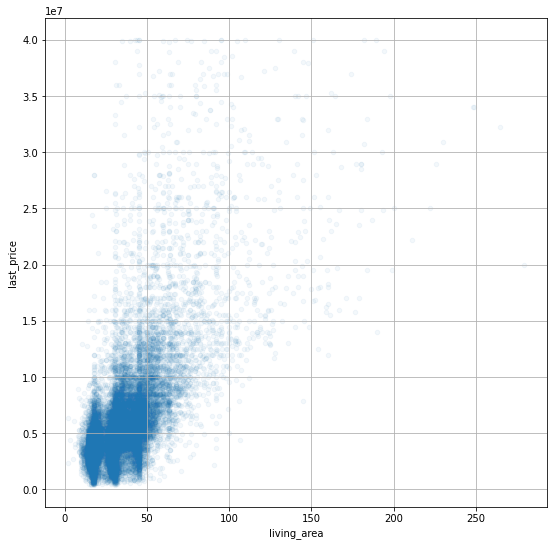

In [79]:
good_data.plot(kind='scatter',y='last_price',x='living_area',grid=True,figsize=(9,9),alpha=0.05);

Наблюдается прямая зависимость выше среднего уровня. По графику видно, что до 50 кв.м. жилая площадь квартиры в меньшей степени влияет на её стоимость, в отличии от квартир с жилой площадью более 50 кв.м.

**Зависимость цены от площади кухни**

In [80]:
good_data['last_price'].corr(good_data['kitchen_area'])

0.580467546703094

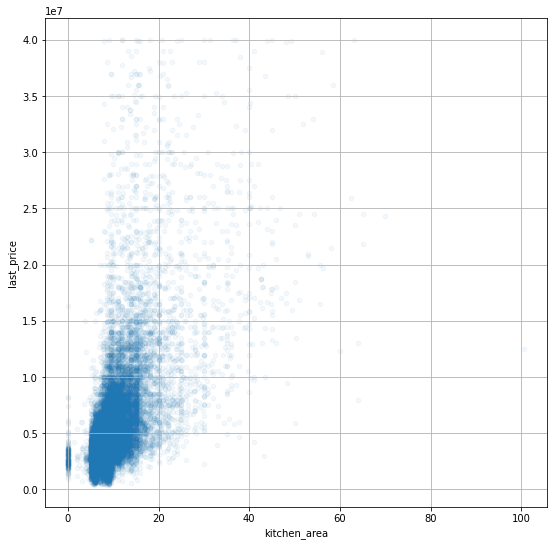

In [81]:
good_data.plot(kind='scatter',y='last_price',x='kitchen_area',grid=True,figsize=(9,9),alpha=0.05);

Наблюдается прямая зависимость выше среднего уровня. По графику видно, что до 10 кв.м.  площадь кухни квартиры в меньшей степени влияет на её стоимость, в отличии от квартир с  площадью кухни более 10 кв.м.

**Зависимость цены от количества комнат**

In [82]:
good_data['last_price'].corr(good_data['rooms'])

0.5202336567427426

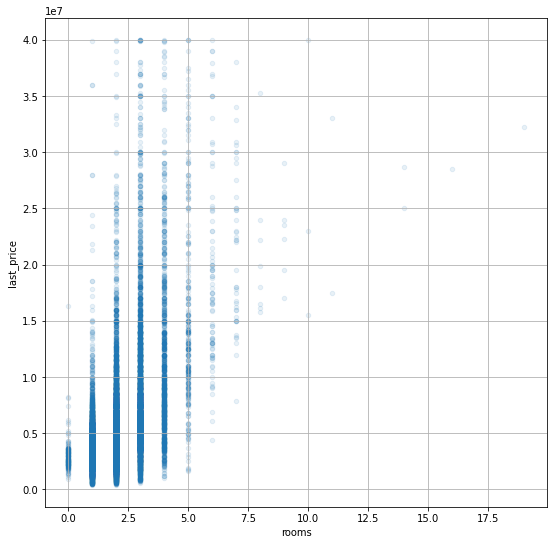

In [83]:
good_data.plot(kind='scatter',y='last_price',x='rooms',grid=True,figsize=(9,9),alpha=0.1);

Прямая зависимость выше среднего уровня, исходя из графика до 5 комнат, цена квартиры постоянно растет, в дальнейшем зависимость не имеет отчетливого влияния.

**Завасимость цены от этажа, на котором расположена квартира**

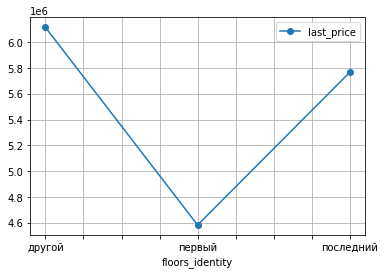

In [84]:
good_data.pivot_table(index='floors_identity', values='last_price',).reset_index().plot(
                      x='floors_identity', y='last_price', grid=True, style='o-');

В данном случае можно с уверенностью утверждать, что цены на квартиры на первом этаже всегда меньше, чем на каком-либо ином

**Зависимость цены от даты размещения (день недели, месяц, год)**

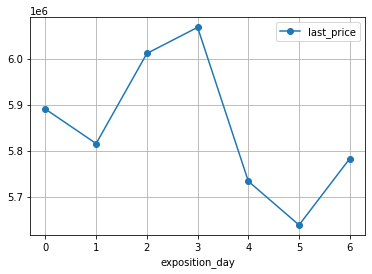

In [85]:
good_data.pivot_table(index='exposition_day',values='last_price').reset_index().plot(x='exposition_day',y='last_price',grid=True,style='o-');

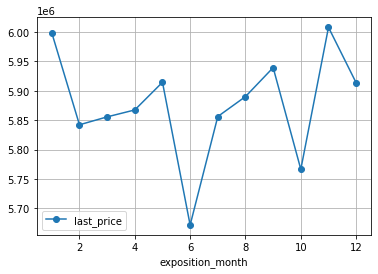

In [86]:
good_data.pivot_table(index='exposition_month',values='last_price').reset_index().plot(x='exposition_month',y='last_price',grid=True,style='o-');

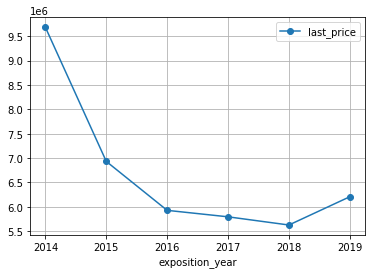

In [87]:
good_data.pivot_table(index='exposition_year',values='last_price').reset_index().plot(x='exposition_year',y='last_price',grid=True,style='o-');

Зависимость цены квартиры от даты размещения объявления выражена слабо, однако нельзя неотметить следующее:
Самая высокая цена приходится на четверг, при этом самая низкая на субботу;
При рассмотрении цены по месяцам наблюдается явная сезонность, самая низкая цена приходится на июнь и октябрь, самая высокая на ноябрь и январь (можно предположить, что июнь и октябрь - месяц отпусков, когда люди уезжают на отдых и необходимости в приобретении квартире в СПБ у них нет);
При рассмотрении цены по годам, наблюдается значительное снижение цен вплоть до 2018 года, в дальнейшем цены начали расти.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра**

In [88]:
top10=good_data.pivot_table(index='locality_name',values='price_for_m',aggfunc={'mean','count'})
top10=top10.sort_values(by='count',ascending=False).head(10)
top10

,count,mean
locality_name,,
санкт-петербург,15186,111378.868903
поселок мурино,552,85629.568678
поселок шушары,439,78551.344545
всеволожск,398,68654.473986
пушкин,368,103100.890905
поселок парголово,327,90175.913458
колпино,324,75307.719720
гатчина,307,68746.146763
деревня кудрово,299,92473.547576


In [89]:
top10.query('mean==mean.max() or mean==mean.min()')

,count,mean
locality_name,,
санкт-петербург,15186,111378.868903
выборг,237,58141.909153


Итак, самым дорогим населенным пунктом относительно стоимости одного квадратного метра является Санкт-Петербург, самым дешевым - Выборг

**Выделии квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра**

In [90]:
good_data_spb=good_data.query('locality_name == "санкт-петербург" and city_centers_nearest!=-1')

,mean
city_centers_nearest,
-0.0,13.451924
1.0,12.687568
2.0,11.987743
3.0,10.125185
4.0,10.981116
5.0,11.532062
6.0,11.042897
7.0,10.663562
8.0,8.934160


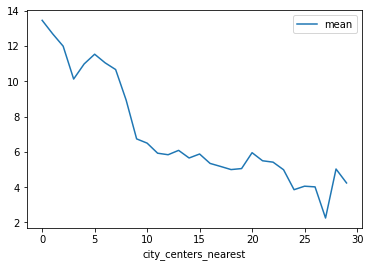

In [91]:
good_data_spb=good_data_spb.pivot_table(index='city_centers_nearest',values='last_price',aggfunc={'mean'})
good_data_spb['mean']=good_data_spb['mean']/1000000
display(good_data_spb)
good_data_spb.plot();

In [92]:
good_data_spb['km']=good_data_spb.index
good_data_spb.corr()

,mean,km
mean,1.000000,-0.903366
km,-0.903366,1.000000


Наблюдаем вполне логичную сильную отрицательную зависимость - чем дальше квартира от центра, тем меньше её цена.

### Общий вывод

Исследованию были подвергнуты данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет<br>
Изначально в данных имелось большое количество пропусков, проводить исследование на основании таких данных было нецелесообразно. Пропущенные значения были заполнены в зависимости от типа и логики данных содержащихся в каждом столбце. Изменен тип данных в столбцах, устранены дубликаты.
1) В ходе исследования были проанализированы следующие показатели:<br>
- общая площадь - наибольшее количество квартир площадью от 25 до 80 квадратных метров, после 80 кв.м. число квартир заметно уменьшается, имеется значительный пик в пределах 40-45 кв.м. <br>
- жилая площадь- большее количество квартир находится в диапазоне от 12 до 50 кв.м. жилой площади, после 60 кв. м. количество квартир значительно уменьшается. При этом имеется два пиковых значения на диапазонах 18-20 кв. м. и 30-32 кв. м. <br>
- площадь кухни - больше всего квартир с площадью кухни от 4 до 16 кв. м., имеется пик на 10 кв.м., однако, следует учесть, что значения, где площадь кухни равна нулю - значения, соответствующие квартирам-студиям и со свободной планировкой.<br>
- цена объекта - больше всего квартир в диапазоне от 1 до 6 млн рублей, имеется пиковое значение в диапазоне 3 млн рублей, после 7.5 миллионов количество квартир значительно уменьшается.<br>
- количество комнат - больше всего квартир, имеющих от 1 до 3 комнат.<br>
- высота потолков - у большей части квартир высота потолков 2.5-2.7 м, пиковое значение также 2.5 м.<br> 
- этаж квартиры - больше всего квартир находятся с 1 по 5 этаж. Пиковое значение - 2 этаж<br>
- тип этажа квартиры («первый», «последний», «другой») - больше всего квартир, которые не находятся на первом или последнем этажах, при этом квартир на последних этажах больше, чем на первых, хоть и незначительно<br>
- общее количество этажей в доме - имеется несколько пиковых значений - 4 этаж, 8 этаж, 16 этаж, 24 этаж, <br>
- расстояние до центра города в метрах - больше всего квартир с расстоянием до центра города от 0 до 1 км, имеются пики на 4-5, 12-13 и 16-17 км., <br>
- расстояние до ближайшего аэропорта - больше всего квартир в диапазоне с удаленностью от аэропорта от 2000 до 56000 м, пиковое значение в диапазоне 24000-26000 метров. <br>
- расстояние до ближайшего парка - больше всего квартир имеют парк в удаленности от 1 до 600 м, пиковое значение - 430-440 м, <br>
- день и месяц публикации объявления - объявления больше всего выкладывались в будние дни, количество объявлений в выходные примерно в два раза меньше, чем в каждый из будних дней. Также можно проследить некую закономерность(сезонность), в выставлении объявлений. Больше всего объявлений выкладывают в период с февраля по апрель, меньше всего в мае, далее, начиная с августа и по ноябрь включительно, опять наблюдается рост числа объявлений<br>

2) В ходе исследования также изучена скорость продажи квартиры - больше всего квартир продается в период до 90 дней, в среднем же продажа квартиры занимает 184 дня, имеются пиковые значения на 45 и на 60 день. Квартира продана быстро, если с момента объявления прошло менее 43 дней и долго, если более 233 дней.<br>

3) Изучены зависимости цены от различных показателей:
- общей площади - наблюдается прямая зависимость выше среднего уровня, до 100 кв.м. площадь квартиры в меньшей степени влияет на её стоимость, в отличии от квартир с площадью более 100 кв.м.<br>
- жилой площади - наблюдается прямая зависимость выше среднего уровня, до 50 кв.м. жилая площадь квартиры в меньшей степени влияет на её стоимость, в отличии от квартир с жилой площадью более 50 кв.м.<br>
- площади кухни - наблюдается прямая зависимость немного меньше среднего уровня, до 10 кв.м. площадь кухни квартиры в меньшей степени влияет на её стоимость, в отличии от квартир с площадью кухни более 10 кв.м.<br>
- количества комнат - прямая зависимость ниже среднего уровня, до 5 комнат, цена квартиры постоянно растет, в дальнейшем зависимость не имеет отчетливого влияния.<br>
- этажа, на котором расположена квартира (первый, последний, другой) - цены на квартиры на первом этаже всегда меньше, чем на каком-либо ином<br>
- даты размещения (день недели, месяц, год) - Зависимость цены квартиры от даты размещения объявления выражена слабо, однако нельзя не отметить что самая высокая цена приходится на четверг, при этом самая низкая на субботу; при рассмотрении цены по месяцам наблюдается явная сезонность, самая низкая цена приходится на июнь и октябрь, самая высокая на ноябрь и январь; При рассмотрении цены по годам, наблюдается значительное снижение цен вплоть до 2018 года, в дальнейшем цены начали расти.<br>

4) Выявили населенные пункты с самой дорогой ценой квартира за кв. м. и с самой дешевой самым дорогим населенным пунктом относительно стоимости одного квадратного метра является Санкт-Петербург, самым дешевым – Выборг.<br>
5) Выявили зависимость цены квартиры в Санкт-Петербурге от её удаленности от центра, вполне логично, что чем дальше квартира от центра, тем меньше её цена.
